# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [ ]:
from shutil import unpack_archive
unpack_archive('lfw.zip')
unpack_archive('dogImages.zip')

In [1]:
import numpy as np
from glob import glob

In [2]:
# load filenames for human and dog images
# e.g. glob("lfw/*/*") creates a list from all file names in all lfw subdirectories which is later convert to numpy array

human_files = np.array(glob("lfw/*/*")) 
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


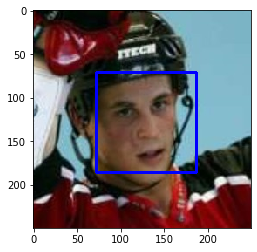

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_fr_human = [face_detector(img_path) for img_path in human_files_short]
human_faces_fr_human_corr_perc = f'{100 * (sum(human_faces_fr_human)/len(human_files_short)):.1f}'

human_faces_fr_dogs = [face_detector(img_path) for img_path in dog_files_short]
human_faces_fr_dogs_wrong_perc = f'{100 * (sum(human_faces_fr_dogs)/len(dog_files_short)):.1f}'

print("The OpenCV face detector detected {}% and {}% human faces in {} input human and dog images, respectively!".\
      format(human_faces_fr_human_corr_perc, human_faces_fr_dogs_wrong_perc, len(human_files_short)))

The OpenCV face detector detected 99.0% and 10.0% human faces in 100 input human and dog images, respectively!


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [11]:
torch.cuda.get_device_name(0)

'Tesla K80'

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [18]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # get the image path and turns it into numpy array (H x W x C)
    img = cv2.imread(img_path)
    
    # define required transformations:convert numpy to tensor, normalize tensor, resize rensor 
    transform = transforms.Compose([
        transforms.ToPILImage(), # first thing first convert numpy array to PIL.Images as torchvision transformations work on PIL.Images
        transforms.Resize(size=(224,224)), # make height and width alike to the minimum requirement of 224 pixels
        transforms.ToTensor(), # convert unit [0-255] values in (H x W x C) shape to [0, 1] float values in (C xH x W ) shape
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalize all three RGB channels as per requirement
                          ])
    # apply the transformations to the provided image and move tensor to GPU
    img = transform(img).cuda()
    
    # make the tensor 4D by adding 1 at index 0 (1 resembles number of batches = 1)
    img = torch.unsqueeze(img, 0)
    
    # pass the img to the pretrained VGG16 model to get 1000 scores for each class index between 0 to 999
    output = VGG16(img)
    
    # get the index of the maximum score (and its irrelevant value)  
    _, class_index = torch.max(output, 1)
        
    return class_index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = VGG16_predict(img_path)
    is_dog = class_index in range(151, 269)
    return is_dog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [14]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

is_dog_dog_files = [dog_detector(img_path) for img_path in dog_files_short]
is_dog_dog_files_true_pos_perc = f'{100 * (sum(is_dog_dog_files)/len(dog_files_short)):.1f}'

is_dog_human_files = [dog_detector(img_path) for img_path in human_files_short]
is_dog_human_files_false_pos_perc = f'{100 * (sum(is_dog_human_files)/len(human_files_short)):.1f}'

print("The pre-trained VGG-16 model predicted {}% and {}% dog classes in {} input dog and human file images, respectively!".\
      format(is_dog_dog_files_true_pos_perc, is_dog_human_files_false_pos_perc, len(human_files_short)))

The pre-trained VGG-16 model predicted 95.0% and 0.0% dog classes in 100 input dog and human file images, respectively!


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# define training and test data directories
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
valid_dir = os.path.join(data_dir, 'valid/')

# load and transform data using ImageFolder
data_transform_train = transforms.Compose([transforms.Resize(size=(224, 224)),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.RandomRotation(25),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalize all three RGB channels simiar to pretrained models
                                           #pixel value ranges from 1 are increased to +4 
                                           ])
                                     
data_transform_non_train = transforms.Compose([transforms.Resize(256),
                                               transforms.CenterCrop(224), # use the non-random versions of the transformations for the validation/test to get consistent predictions
                                               transforms.ToTensor(), 
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalize all three RGB channels simiar to pretrained models
                                               ])
                                     
    
train_data = datasets.ImageFolder(train_dir, transform=data_transform_train)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform_non_train)
test_data = datasets.ImageFolder(test_dir, transform=data_transform_non_train)

# define dataloader parameters
batch_size = 40
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)

# make a dictionary of data loaders
loaders = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

# store all the dog breed names in a list  
dog_breeds = [path.split('.', 1)[1] for path in next(os.walk('dogImages/train'))[1]]
dog_breads_num = len(dog_breeds)

In [16]:
len(train_loader)*batch_size

6680

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- Resize transform is used to make all image sizes consistent at 224 pixels which is the typical size that is used in image classification. Pixel resolution of some images are less than 224, which then the software automatically adjusts sizes.
- Data augmentation is crucial for such a small training dataset (6680 images). RandomHorizontalFlip and RandomRotation transformations are used to increase training dataset and also help model to generalize.   

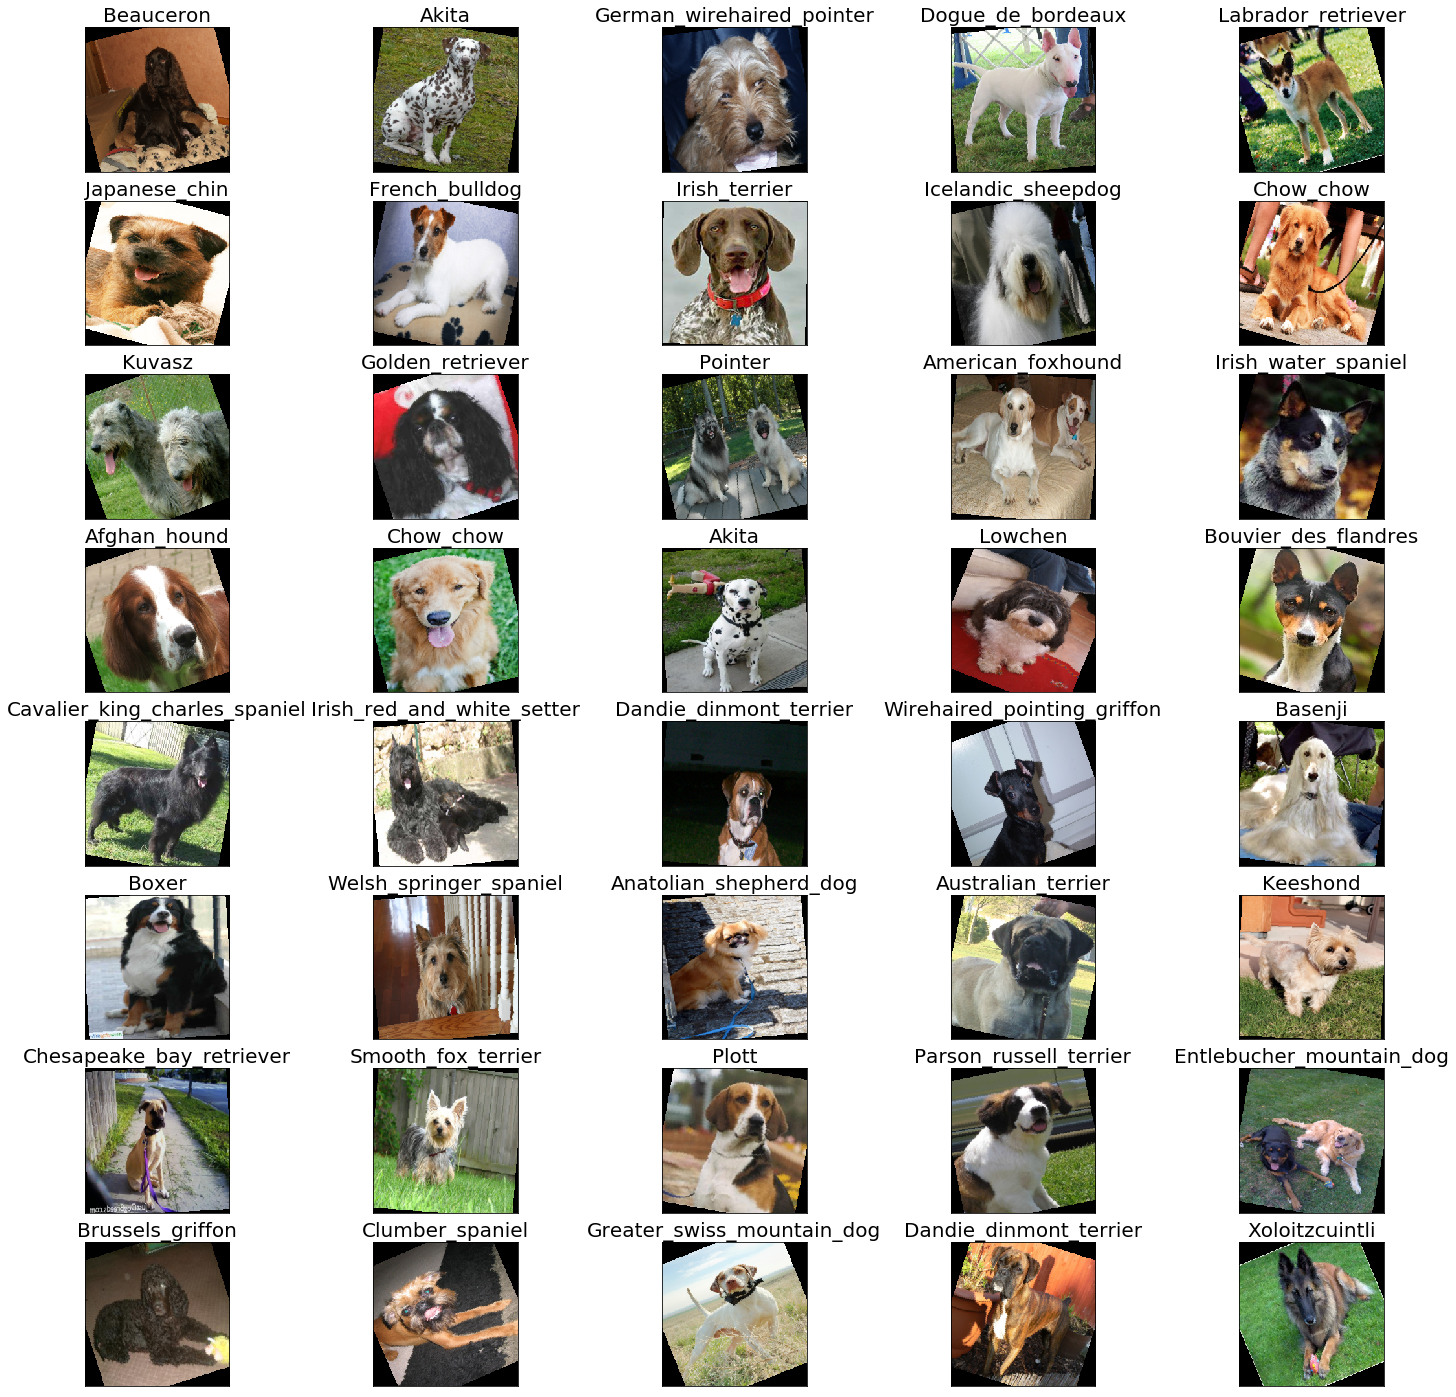

In [9]:
# Visualize some sample data
import matplotlib.pyplot as plt                        
%matplotlib inline

# obtain one batch of training images
# to display images, all the three RGB channels should be properly scaled between [0, 1] which is not the case if normalization is to be applied
train_data = datasets.ImageFolder(train_dir, transform=transforms.Compose([transforms.Resize(size=(224, 224)),
                                                                           transforms.RandomHorizontalFlip(),
                                                                           transforms.RandomRotation(25),
                                                                           transforms.ToTensor()
                                                                           ]))
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

dataiter = iter(train_loader)
images, labels = dataiter.next()

images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 25))
for idx in np.arange(40):
    ax = fig.add_subplot(8, 40/8, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0))) # convert (C x H x W) tensor-format shape to (H x W x C) numpy-format shape to pass to plt.imshow
    ax.set_title(dog_breeds[labels[idx]], fontsize=20)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn
import torch.nn.functional as F
import collections

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.features = nn.Sequential(collections.OrderedDict([
            ('conv1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)),
            ('batchnorm1', nn.BatchNorm2d(num_features=16)),
            ('relu1', nn.ReLU(inplace=True)),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),            
            ('conv2', nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)),
            ('batchnorm2', nn.BatchNorm2d(num_features=16)),
            ('relu2', nn.ReLU(inplace=True)),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv3', nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, stride=1, padding=1)),
            ('batchnorm3', nn.BatchNorm2d(num_features=64)),
            ('relu3', nn.ReLU(inplace=True)),
            ('maxpool3', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv4', nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)),
            ('batchnorm4', nn.BatchNorm2d(num_features=64)),
            ('relu4', nn.ReLU(inplace=True)),
            ('maxpool4', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv5', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)),
            ('batchnorm5', nn.BatchNorm2d(num_features=128)),
            ('relu5', nn.ReLU(inplace=True)),
            ('maxpool5', nn.MaxPool2d(kernel_size=2, stride=2))            
        ]))
        
        self.classifier = nn.Sequential(collections.OrderedDict([           
            ('fc1', nn.Linear(in_features=128*7*7, out_features=1024, bias=True)),
            ('batchnorm6', nn.BatchNorm1d(num_features=1024)),  
            ('relu6', nn.ReLU(inplace=True)),
            ('fc2', nn.Linear(in_features=1024, out_features=133, bias=True))
        ]))
      
   
    def forward(self, x):
        ## Define forward behavior
        x = self.features(x)
        x = x.view(-1, 128*7*7) # flatten feature vector prior to entering classifier
        x = self.classifier(x)
        return x

    
# define weight initilizations expilicitly based on random normal distribtion 
def init_normal(m):
    if isinstance(m, nn.Conv2d):
        n_input_fmaps = m.in_channels
        a = (1.0/np.sqrt(n_input_fmaps))
        nn.init.normal_(m.weight, mean=0.0, std=a)
        nn.init.normal_(m.bias, mean=0.0, std=a)
    if isinstance(m, nn.Linear):
        n_input_vector = m.in_features
        b = (1.0/np.sqrt(n_input_vector))
        nn.init.normal_(m.weight, mean=0.0, std=b)
        nn.init.normal_(m.bias, mean=0.0, std=b)
        
# use the modules apply function to recursively apply the normal initialization to all selected layers
Net().apply(init_normal)    
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (features): Sequential(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding

### check model parameter values and shapes

In [11]:
conv3 = list(model_scratch.parameters())[8].data.cpu().numpy()

In [12]:
conv3.mean()

0.0001681402

In [13]:
conv3.std()

0.04791989

In [14]:
1.0/np.sqrt(64)

0.125

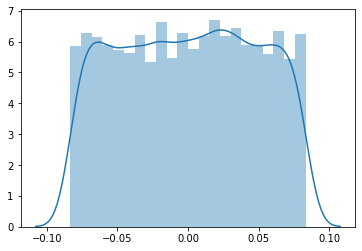

In [16]:
import seaborn as sns
sns.distplot(conv3)

In [11]:
next(model_scratch.parameters()).is_cuda

True

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Breed classification is a challenging task however as training dataset is small, a medium size CNN is designed:
- 5 convolutional layers are defined such that they preserve spatial information.
- Output of each CONV layer enters a BatchNorm layer to get normalized prior to activation layers. That is done in analogy to normalziing the initial weights and biases. Also, ReLu activation layers do not have normalizing effects. 
- The common ReLu activation layers are used due to their less computation cost and simpilicity.  
- MaxPooling size of (2, 2) reduces the preserved 224*224 size after each CONV layer to the managable 7*7 size prior to entering the fully connected layer. 
- CONV2 and CONV4 layers do not increase the depth. They were needed to avoid large MaxPoooling filters like (4, 4) that dicards much more useful information. In their absence, the final feature vector would be 16 times larger should the typical (2, 2) filter size is used.
- Fully conncted layer with two hidden layers at the end of the feature extractor section (CONV layers) acts as the classifier.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [19]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(params=model_scratch.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = ReduceLROnPlateau(optimizer=optimizer_scratch, mode='min', factor=np.sqrt(0.1), patience=5, min_lr=0.5e-6 )

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
class WindowsInhibitor:
    '''Prevent OS sleep/hibernate in windows; code from:
    https://github.com/h3llrais3r/Deluge-PreventSuspendPlus/blob/master/preventsuspendplus/core.py
    API documentation:
    https://msdn.microsoft.com/en-us/library/windows/desktop/aa373208(v=vs.85).aspx'''
    ES_CONTINUOUS = 0x80000000
    ES_SYSTEM_REQUIRED = 0x00000001

    def __init__(self):
        pass

    def inhibit(self):
        import ctypes
        print("Preventing Windows from going to sleep")
        ctypes.windll.kernel32.SetThreadExecutionState(
            WindowsInhibitor.ES_CONTINUOUS | \
            WindowsInhibitor.ES_SYSTEM_REQUIRED)

    def uninhibit(self):
        import ctypes
        print("Allowing Windows to go to sleep")
        ctypes.windll.kernel32.SetThreadExecutionState(
            WindowsInhibitor.ES_CONTINUOUS)

In [21]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Forward pass, get our log-probabilities output
            output = model(data)
            # Calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss for each passed mini-batch at the end of each epoch
            train_loss += loss.item()*data.size(0)           
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        # Turn off gradients for validation to save memory and computations
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                # forward pass: compute predicted outputs by passing inputs to the model
            
                output = model(data)
                # calculate the batch loss
                loss = criterion(output, target)
                # update validation loss for each passed mini-batch at the end of each epoch 
                valid_loss += loss.item()*data.size(0)
        
        # update the learning rate according to the schedule
        lr_scheduler.step(metrics=valid_loss)
            
        # calculate average losses for all batches at the end of each epoch
        train_loss /= len(loaders['train'].dataset)
        valid_loss /= len(loaders['valid'].dataset)
           
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
       
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
#         torch.save(model.state_dict(), 'model_scratch.pt') # comment out when to train model_scratch
        torch.save(model.state_dict(), 'model_transfer.pt') # comment whennto train model_scratch
        valid_loss_min = valid_loss
            
    # return trained model
    return model

In [30]:
# train the model

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)


start.record()

# keep the windows awake during long training run-time
osSleep = None

if os.name == 'nt':
    osSleep = WindowsInhibitor()
    osSleep.inhibit()

model_scratch = train(30, loaders, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

if osSleep:
    osSleep.uninhibit()

end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print('\nTraining and validation on GPU executed in {:.2f} minutes.'.format(start.elapsed_time(end) * 1.66667e-5))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.678504 	Validation Loss: 4.523400
Validation loss decreased (inf --> 4.523400).  Saving model ...
Epoch: 2 	Training Loss: 4.280404 	Validation Loss: 4.343810
Validation loss decreased (4.523400 --> 4.343810).  Saving model ...
Epoch: 3 	Training Loss: 4.072779 	Validation Loss: 4.224874
Validation loss decreased (4.343810 --> 4.224874).  Saving model ...
Epoch: 4 	Training Loss: 3.910789 	Validation Loss: 4.292900
Epoch: 5 	Training Loss: 3.781956 	Validation Loss: 4.099226
Validation loss decreased (4.292900 --> 4.099226).  Saving model ...
Epoch: 6 	Training Loss: 3.638661 	Validation Loss: 4.085794
Validation loss decreased (4.099226 --> 4.085794).  Saving model ...
Epoch: 7 	Training Loss: 3.527121 	Validation Loss: 3.953727
Validation loss decreased (4.085794 --> 3.953727).  Saving model ...
Epoch: 8 	Training Loss: 3.418958 	Validation Loss: 3.924255
Validation loss decreased (3.953727 --> 3.924255).  Saving model ...
Epoch: 9 	Training Loss: 3.314625 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [31]:
# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.669698


Test Accuracy: 15% (128/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [11]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# instantiate model 
model_transfer = models.vgg16(pretrained=True)

# freeze the pre-trained CNN feature extraction section not ot be trained
for param in model_transfer.features.parameters():
    param.requires_grad = False

# customize the last fully connected layer of the pre-trained CNN classifier to generate required outputs (133 dog breeds)
n_inputs = model_transfer.classifier[6].in_features # number of input features remains unchanged
last_fc_layer = nn.Linear(in_features=n_inputs, out_features=dog_breads_num) # number of output features is set to number of dog breads 
model_transfer.classifier[6] = last_fc_layer # assign the customized layer back to

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

- Feature pamaraters are freezed and used as a fixed part of model_transfer as they have been trained on a huge dataset compared to our toy dataset here.
- However, the classifier (fully connected layer) needs to be customized and trained thereafter; customized to generate new class labels (133 versus original 1000) and trained as the number of neurons are changed accoring to new output labels.
- The input to the last hidden layer remains unchanged but the output is changed according to the number of dog breed classes.
- A last hidden layer is defined based on the unchanged input number and new output feature number and then is assigned back to the model using its index to replace the orginal pre-trained last hidden layer.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [23]:
criterion_transfer = nn.CrossEntropyLoss()

optimizer_transfer = optim.SGD(params=model_transfer.classifier.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = ReduceLROnPlateau(optimizer=optimizer_transfer, mode='min', factor=np.sqrt(0.1), patience=10, min_lr=0.5e-6 )

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [24]:
# train the model
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

# keep the windows awake during long training run-time
osSleep = None

if os.name == 'nt':
    osSleep = WindowsInhibitor()
    osSleep.inhibit()

model_transfer = train(20, loaders, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

if osSleep:
    osSleep.uninhibit()

end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print('\nTraining and validation on GPU executed in {:.2f} minutes.'.format(start.elapsed_time(end) * 1.66667e-5))

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.509001 	Validation Loss: 0.820145
Validation loss decreased (inf --> 0.820145).  Saving model ...
Epoch: 2 	Training Loss: 1.023174 	Validation Loss: 0.630950
Validation loss decreased (0.820145 --> 0.630950).  Saving model ...
Epoch: 3 	Training Loss: 0.818768 	Validation Loss: 0.557768
Validation loss decreased (0.630950 --> 0.557768).  Saving model ...
Epoch: 4 	Training Loss: 0.718973 	Validation Loss: 0.494788
Validation loss decreased (0.557768 --> 0.494788).  Saving model ...
Epoch: 5 	Training Loss: 0.619177 	Validation Loss: 0.515163
Epoch: 6 	Training Loss: 0.573893 	Validation Loss: 0.491051
Validation loss decreased (0.515163 --> 0.491051).  Saving model ...
Epoch: 7 	Training Loss: 0.517365 	Validation Loss: 0.478726
Validation loss decreased (0.491051 --> 0.478726).  Saving model ...
Epoch: 8 	Training Loss: 0.458349 	Validation Loss: 0.469971
Validation loss decreased (0.478726 --> 0.469971).  Saving model ...
Epoch: 9 	Training Loss: 0.421367 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.483954


Test Accuracy: 85% (718/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [13]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# dog_breeds = [path.split('.', 1)[1] for path in next(os.walk('dogImages/train'))[1]]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    '''
    Use trained model to predict dog breeds indices for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    ''' 
    
    # get the image path and turns it into numpy array (H x W x C)
#     breakpoint()
    img = cv2.imread(img_path)  
    # define required transformations:convert numpy to tensor, normalize tensor, resize rensor 
    transform = transforms.Compose([
        transforms.ToPILImage(), # first thing first convert numpy array to PIL.Images as torchvision transformations work on PIL.Images
        transforms.Resize(size=(224, 224)), # make height and width alike to the minimum requirement of 224 pixels
        transforms.ToTensor(), # convert unit [0-255] values in (H x W x C) shape to [0, 1] float values in (C xH x W ) shape
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalize all three RGB channels as per requirement
        ])
    # apply the transformations to the provided image
    img = transform(img).cuda()
    
    # make the tensor 4D by adding 1 at index 0 (1 resembles number of batches = 1)
    img = torch.unsqueeze(img, 0)
    
    # pass the img to the trained model to get 133 scores for each class index between 0 to 132
    output = model_transfer(img)
    
    # get the index of the maximum score (and its irrelevant value)  
    _, class_index = torch.max(output, 1)
    
    # get the class label of the class_index
    dog_breed = dog_breeds[class_index]
    
    return dog_breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [14]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    imgplot = plt.imshow(img)
    
    if dog_detector(img_path):
        print("Hey doggy! You look like a ...{}.".format(predict_breed_transfer(img_path)))
        plt.show()
    elif face_detector(img_path):
        print("Hello human! You look like a ...{}.".format(predict_breed_transfer(img_path)))
        plt.show()
    else:
        print("Oops! I can't detect a human or a dog!")
        plt.show()

    return 

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

It is worse :(
- 1. Try to train model with higher EPOCHs to achieve higher accuracy
- 2. Try different data augmentation process
- 3. Try a different model to achieve higher accuracy

Hello human! You look like a ...Glen_of_imaal_terrier.


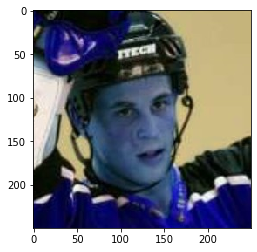

Hello human! You look like a ...Maltese.


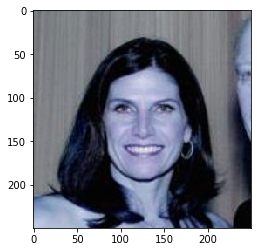

Hello human! You look like a ...Brussels_griffon.


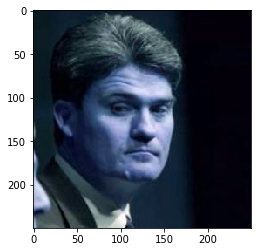

Hey doggy! You look like a ...Italian_greyhound.


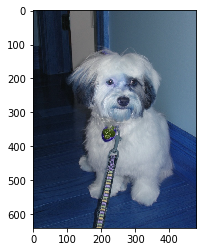

Hey doggy! You look like a ...Italian_greyhound.


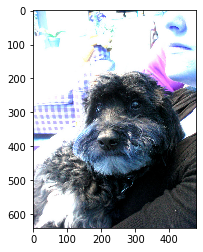

Hey doggy! You look like a ...Italian_greyhound.


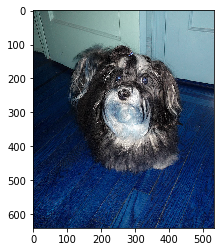

In [19]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [21]:
from shutil import unpack_archive
unpack_archive('testImageSamples.zip')
computer_test_files = np.array(glob("testImageSamples/*"))

Hey doggy! You look like a ...American_staffordshire_terrier.


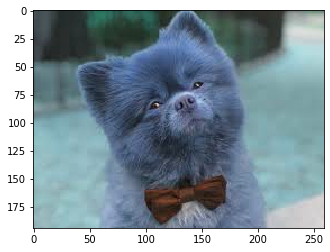

Hello human! You look like a ...Miniature_schnauzer.


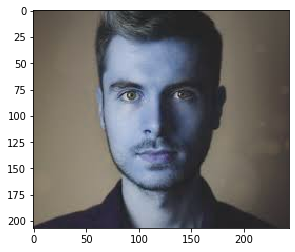

Hey doggy! You look like a ...Leonberger.


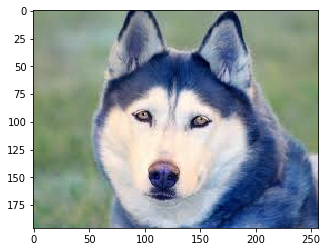

Hey doggy! You look like a ...Irish_water_spaniel.


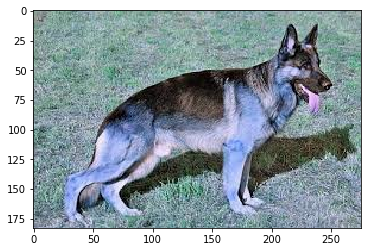

Hello human! You look like a ...Silky_terrier.


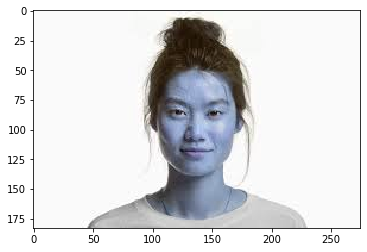

Hello human! You look like a ...Maltese.


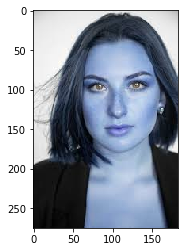

Hey doggy! You look like a ...Gordon_setter.


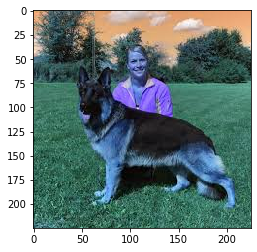

Oops! I can't detect a human or a dog!


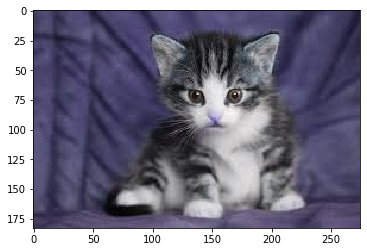

Hey doggy! You look like a ...Pomeranian.


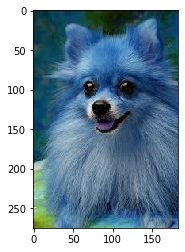

In [22]:
for file in computer_test_files:
    run_app(file)